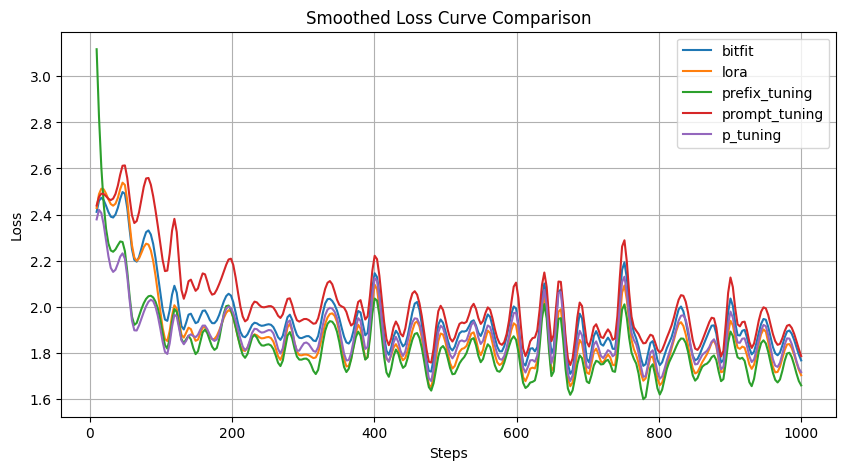

In [2]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

def read_losses(file_path):
    with open(file_path, 'r') as file:
        data = file.readlines()
    
    steps = []
    losses = []
    for line in data:
        step, loss = line.split(':')
        steps.append(int(step.strip()))
        losses.append(float(loss.strip()))
    return steps, losses

def smooth_curve(x, y, num_points=300):
    spline = interp1d(x, y, kind='cubic')
    x_smooth = np.linspace(min(x), max(x), num_points)
    y_smooth = spline(x_smooth)
    return x_smooth, y_smooth

def plot_losses(root_folder):
    file_paths = glob.glob(os.path.join(root_folder, '**/losses.txt'), recursive=True)
    
    plt.figure(figsize=(10, 5))
    for path in file_paths:
        steps, losses = read_losses(path)
        steps_smooth, losses_smooth = smooth_curve(steps, losses)
        plt.plot(steps_smooth, losses_smooth, label=os.path.basename(os.path.dirname(path)))
    
    plt.xlabel('Steps')
    plt.ylabel('Loss')
    plt.title('Smoothed Loss Curve Comparison')
    plt.legend()
    plt.grid(True)
    plt.show()

root_folder = './'
plot_losses(root_folder)
